<a href="https://colab.research.google.com/github/LynaMahdi/Construction-site-safety-equipment-detection/blob/main/Construction_site_safety_equipement_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Sat Mar  4 10:20:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    33W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Clone yolov7 repository and install the requirements.txt **bold text**

In [3]:
!git clone "https://github.com/WongKinYiu/yolov7"
%cd yolov7 
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1130, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1130 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1130/1130), 69.94 MiB | 4.58 MiB/s, done.
Resolving deltas: 100% (519/519), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.3 MB/s eta 0:00:00


# Download Dataset from RoboFlow


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2XTS53AzfDGjrU8AHFeX")
project = rf.workspace("roboflow-universe-projects").project("construction-site-safety")
dataset = project.version(27).download("yolov7")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=e83b9ada4297779c280c21374b279c7e583202f9ff02da96e3a30ff063d1d149
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Construction-Site-Safety-27 in yolov7pytorch:: 100%|██████████| 5610/5610 [00:02<00:00, 2482.55it/s]


#**Download coco dataset yolov7.pt**



In [5]:
%cd /content/yolov7
!python -m wget "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt"

/content/yolov7

Saved under yolov7.pt


#**Training**

In [6]:
%cd /content/yolov7
!python train.py --batch-size 16 --cfg cfg/training/yolov7.yaml  --epochs 40 --data {dataset.location}/data.yaml   --weights yolov7.pt

/content/yolov7
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='/content/yolov7/Construction-Site-Safety-27/data.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2023-03-04 10:24:11.116456: I tensorflow/core/platform/cpu_feature_gua

In [9]:
%cd /content/yolov7
!python detect.py --weights runs/train/exp/weights/best.pt  --conf 0.1 --source {dataset.location}/test/images/

/content/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov7/Construction-Site-Safety-27/test/images/', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15101.8125MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36530318 parameters, 6194944 gradients, 103.3 GFLOPS
 Convert model to Traced-model... 


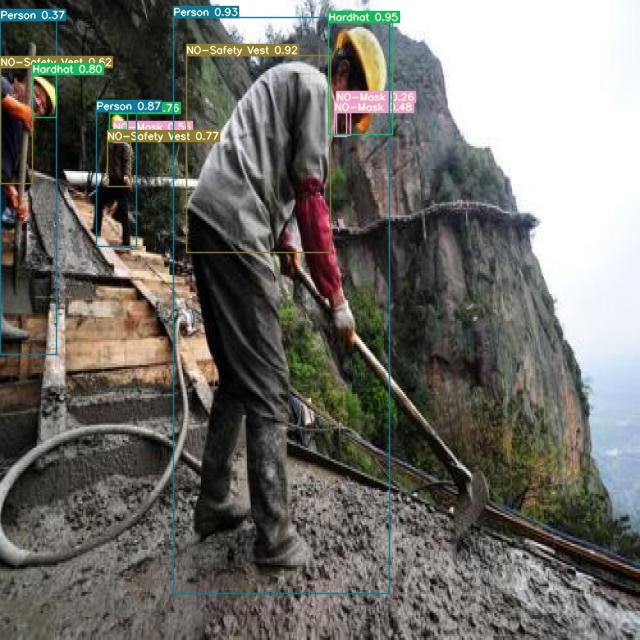

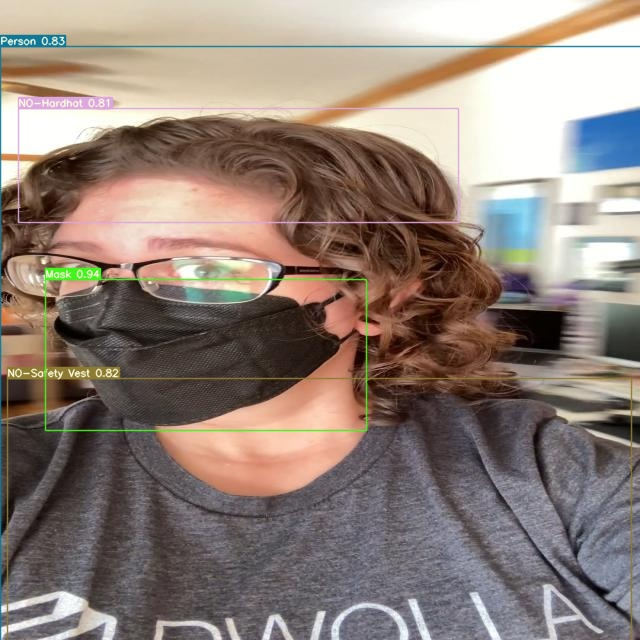

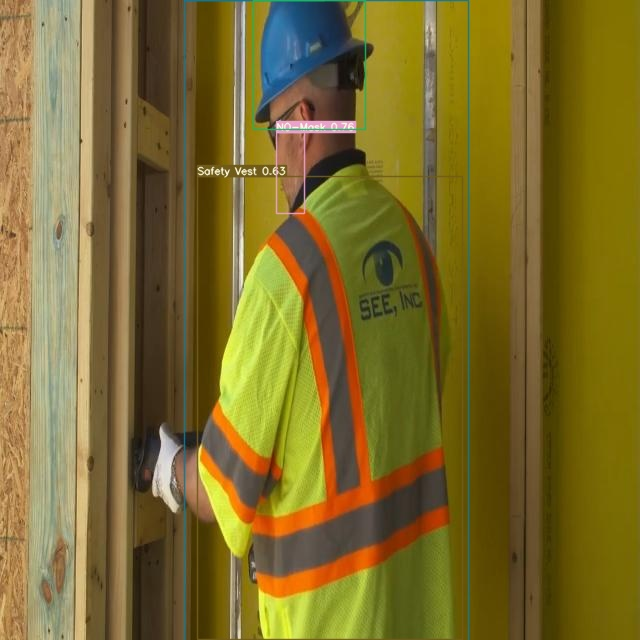

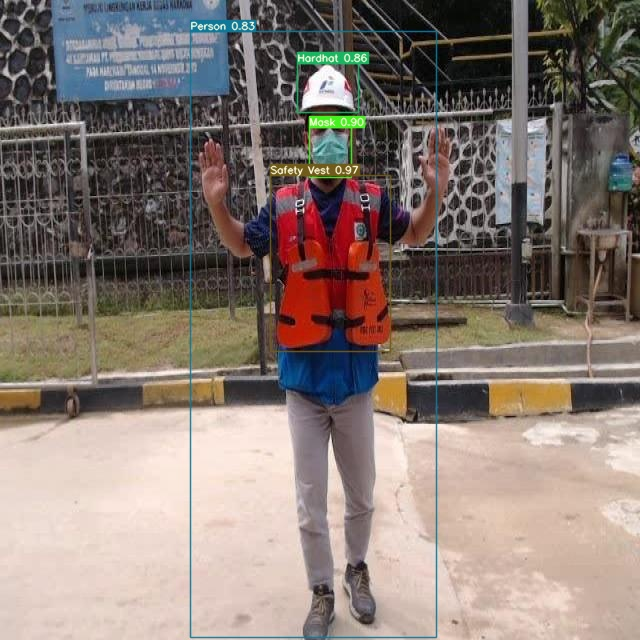

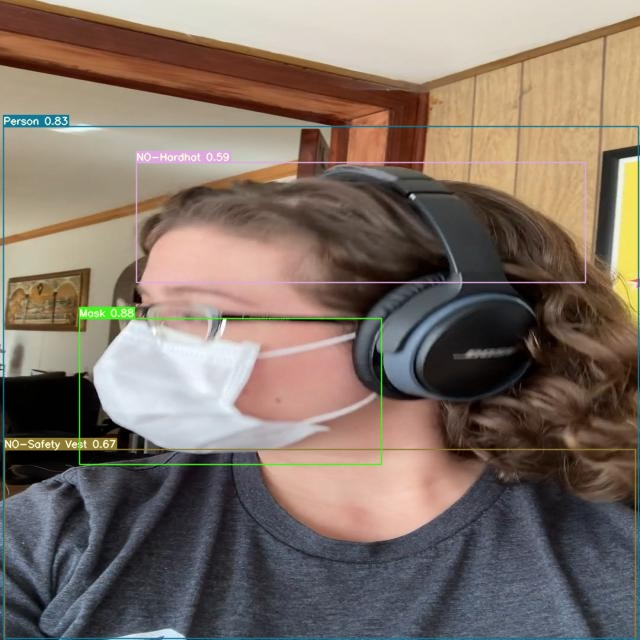

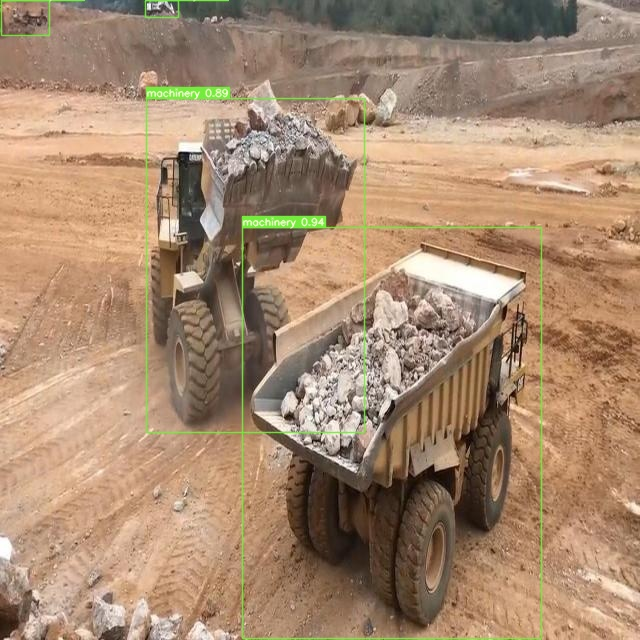

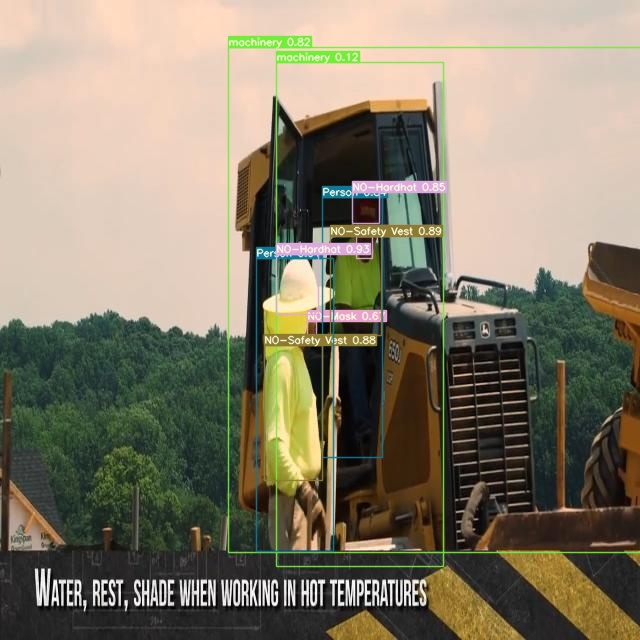

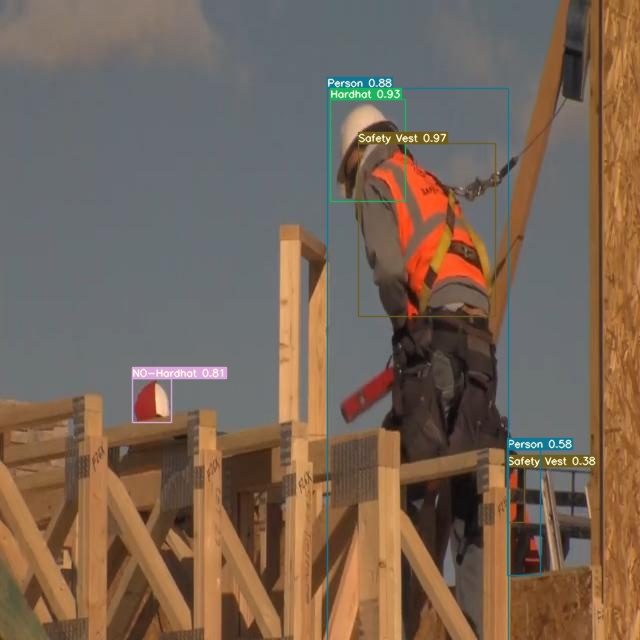

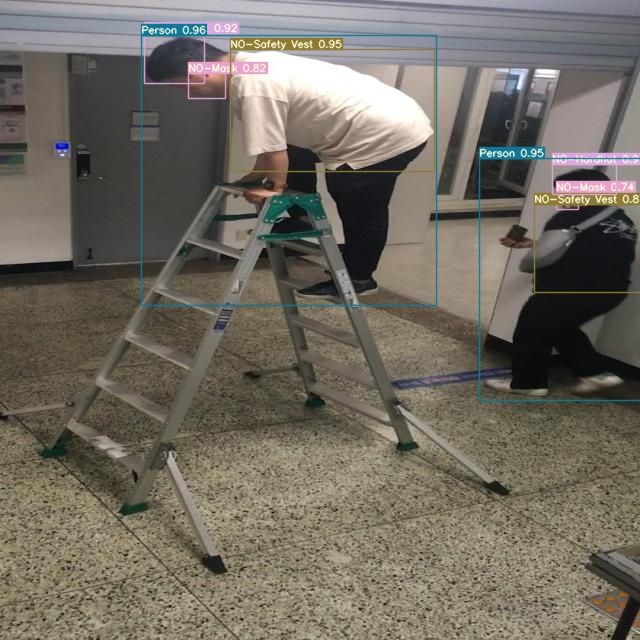

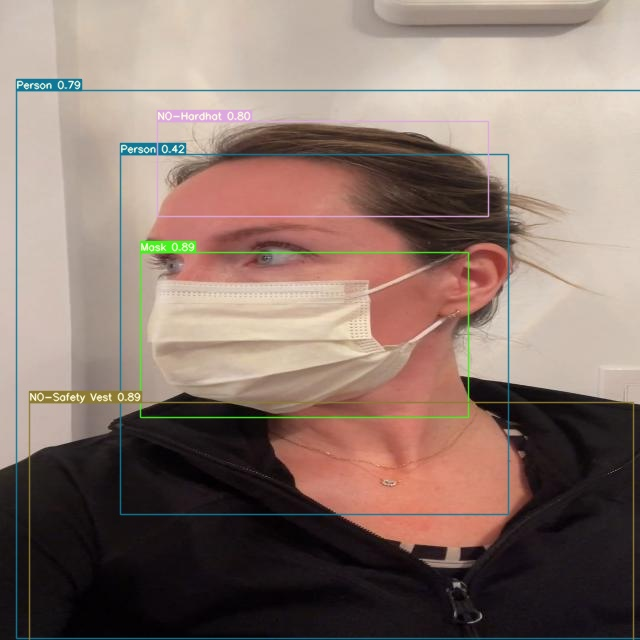

In [12]:

import glob
from IPython.display import Image, display

i = 0
limit = 10
for imageName in glob.glob('/content/yolov7/runs/detect/exp/*.jpg'):
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1